In [1]:
import numpy as np
import seaborn as sns

In [2]:
def fill_triangular(L, D_in):
    lower_indices = np.tril_indices(D_in)
    l_matrix = np.zeros((D_in, D_in), dtype=L.dtype)
    l_matrix[lower_indices] = L
    return l_matrix

In [3]:
kernel_data = np.load('results/run-0012/kernel/kernel_samples.npz')
print('Params saved: ', list(kernel_data.keys()))

Params saved:  ['kern.L', 'D', 'kernel', 'prior', 'test_mnll', 'test_error_rate', 'test_nrmse']


In [11]:
D = kernel_data['D']
num_samples = kernel_data['kern.L'][0].shape[0]
precision_samples = np.empty((num_samples, D, D)) # S x D x D
for s in  range(num_samples):
    L =  fill_triangular(kernel_data['kern.L'][s], D) 
    precision = L @ L.T
    precision_samples[s] = precision
precision_mean = np.mean(precision_samples, axis=0) # D x D
precision_std = np.std(precision_samples, axis=0) # D x D

<AxesSubplot:>

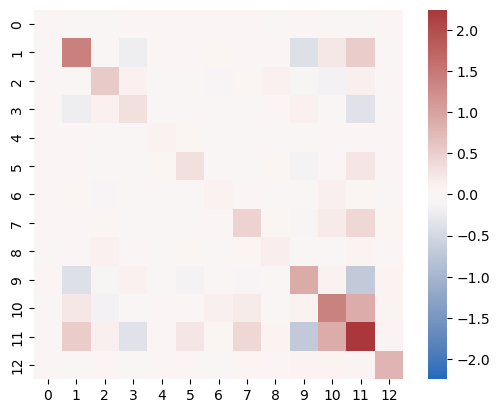

In [14]:
sns.heatmap(precision_mean, cmap='vlag', vmin=-np.max(precision), center=0, vmax=np.max(precision), square=True)